In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
#위 코드는 matplotlib 에 내장된 폰트 관리 모듈
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
# 위코드는 폰트 위치 그리고 폰트파일 명
plt.rc("font", family=font_name)
# 위 코드는 위치알려준 코드와 matplotlib  연동 코드

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
# 위 코드는 그래프에 - 넣으려는 코드

import seaborn as sns

import glob
import os

# 지도 시각화
import folium
import json

# ================================================================================== 정규 표현식 모듈
import re

# 날짜 모듈
import datetime

# 달력 모듈
import calendar

In [86]:
# API를 이용한 데이터 가져오기(https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15043378)

import requests

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'

params ={'serviceKey' : 'sebwLprlMHJs6ZEC6v/LBpa48P76BzTMLdRgO/eEEyBr3VeRf5/Gj/V+D0rKh6EEfzphWivGcE5NahhVd/L4EQ==', 'pageNo' : '1', 'numOfRows' : '10', 'startCreateDt' : '20200410', 'endCreateDt' : '20200410' }

response = requests.get(url, params = params)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2020-04-10 09:00:00.000</createDt><deathCnt>208</deathCnt><defCnt>10450</defCnt><gubun>\xed\x95\xa9\xea\xb3\x84</gubun><gubunCn>\xe5\x90\x88\xe8\xae\xa1</gubunCn><gubunEn>Total</gubunEn><incDec>27</incDec><isolClearCnt>6871</isolClearCnt><localOccCnt>17</localOccCnt><overFlowCnt>10</overFlowCnt><qurRate>20.16</qurRate><seq>1558</seq><stdDay>2020\xeb\x85\x84 04\xec\x9b\x94 10\xec\x9d\xbc 00\xec\x8b\x9c</stdDay><updateDt>2021-09-16 10:11:33.897</updateDt></item><item><createDt>2020-04-10 09:00:00.000</createDt><deathCnt>2</deathCnt><defCnt>595</defCnt><gubun>\xec\x84\x9c\xec\x9a\xb8</gubun><gubunCn>\xe9\xa6\x96\xe5\xb0\x94</gubunCn><gubunEn>Seoul</gubunEn><incDec>5</incDec><isolClearCnt>178</isolClearCnt><localOccCnt>3</localOccCnt><overFlowCnt>2</overFlowCnt><qurRate>6.11</qurRate><seq>1557</seq><stdDay>2020\xeb

In [87]:
# 데이터 불러오기

corona_seoul = pd.read_csv("서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding="euc-kr", thousands=",")
corona_seoul.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.03.30.00,37261,1045,33753,919,55376,1504,81018,1990,96008,...,104368,3839,136200,3872,176765,4479,121926,3084,164008,4988
1,2022.03.29.00,36216,940,32835,957,53872,1481,79030,2233,93474,...,100529,1660,132333,3524,172292,4913,118842,2996,159020,3230
2,2022.03.28.00,35276,397,31878,301,52391,739,76802,694,91030,...,98869,1996,128813,2517,167386,2013,115846,2297,155792,1630
3,2022.03.27.00,34879,818,31577,674,51652,932,76108,1930,89876,...,96873,1749,126296,2304,165373,3723,113549,2900,154162,3116
4,2022.03.26.00,34061,854,30903,793,50720,1234,74178,1685,87770,...,95124,2467,123992,3862,161650,4013,110649,3133,151046,4050


In [88]:
corona_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  786 non-null    object
 1   종로구 전체   786 non-null    int64 
 2   종로구 추가   786 non-null    int64 
 3   중구 전체    786 non-null    int64 
 4   중구 추가    786 non-null    int64 
 5   용산구 전체   786 non-null    int64 
 6   용산구 추가   786 non-null    int64 
 7   성동구 전체   786 non-null    int64 
 8   성동구 추가   786 non-null    int64 
 9   광진구 전체   786 non-null    int64 
 10  광진구 추가   786 non-null    int64 
 11  동대문구 전체  786 non-null    int64 
 12  동대문구 추가  786 non-null    int64 
 13  중랑구 전체   786 non-null    int64 
 14  중랑구 추가   786 non-null    int64 
 15  성북구 전체   786 non-null    int64 
 16  성북구 추가   786 non-null    int64 
 17  강북구 전체   786 non-null    int64 
 18  강북구 추가   786 non-null    int64 
 19  도봉구 전체   786 non-null    int64 
 20  도봉구 추가   786 non-null    int64 
 21  노원구 전체   786 non-null    int64 
 22  노원

In [89]:
# 일별 확진자 수만 불러오기

corona_gu = corona_seoul[['자치구 기준일','종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가',
             '동대문구 추가', '중랑구 추가', '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가',
             '은평구 추가', '서대문구 추가', '마포구 추가', '양천구 추가', '강서구 추가', '구로구 추가', 
             '금천구 추가', '영등포구 추가', '동작구 추가', '관악구 추가', '서추구 추가', '강남구 추가',
             '송파구 추가', '강동구 추가', '기타 추가']]
corona_gu.head()

,자치구 기준일,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,...,구로구 추가,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가,기타 추가
0,2022.03.30.00,1045,919,1504,1990,2534,2442,3033,3253,2184,...,3812,1847,4122,3283,4679,3839,3872,4479,3084,4988
1,2022.03.29.00,940,957,1481,2233,2444,2718,2837,3028,2180,...,2595,1894,2072,2290,2821,1660,3524,4913,2996,3230
2,2022.03.28.00,397,301,739,694,1154,975,1060,1083,751,...,963,553,1193,1239,1431,1996,2517,2013,2297,1630
3,2022.03.27.00,818,674,932,1930,2106,1957,2669,3063,1674,...,2672,1468,2567,2437,2961,1749,2304,3723,2900,3116
4,2022.03.26.00,854,793,1234,1685,2210,2039,2447,2516,1724,...,2642,1554,2693,2398,3222,2467,3862,4013,3133,4050


In [90]:
# 칼럼명 수정

corona_gu.rename(columns={  '종로구 추가':'종로구',
                            '중구 추가':'중구',
                            '용산구 추가':'용산구',
                            '성동구 추가':'성동구',
                            '광진구 추가':'광진구',
                            '동대문구 추가':'동대문구',
                            '중랑구 추가':'중랑구',
                            '성북구 추가':'성북구',
                            '강북구 추가':'강북구',
                            '도봉구 추가':'도봉구',
                            '노원구 추가':'노원구',
                            '은평구 추가':'은평구',
                            '서대문구 추가':'서대문구',
                            '마포구 추가':'마포구',
                            '양천구 추가':'양천구',
                            '강서구 추가':'강서구',
                            '구로구 추가':'구로구',
                            '금천구 추가':'금천구',
                            '영등포구 추가':'영등포구',
                            '동작구 추가':'동작구',
                            '관악구 추가':'관악구',
                            '서추구 추가':'서초구',
                            '강남구 추가':'강남구',
                            '송파구 추가':'송파구',
                            '강동구 추가':'강동구',
                            '기타 추가':'기타'}, inplace=True)
corona_gu.head()

C:\Users\ch002\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2022.03.30.00,1045,919,1504,1990,2534,2442,3033,3253,2184,...,3812,1847,4122,3283,4679,3839,3872,4479,3084,4988
1,2022.03.29.00,940,957,1481,2233,2444,2718,2837,3028,2180,...,2595,1894,2072,2290,2821,1660,3524,4913,2996,3230
2,2022.03.28.00,397,301,739,694,1154,975,1060,1083,751,...,963,553,1193,1239,1431,1996,2517,2013,2297,1630
3,2022.03.27.00,818,674,932,1930,2106,1957,2669,3063,1674,...,2672,1468,2567,2437,2961,1749,2304,3723,2900,3116
4,2022.03.26.00,854,793,1234,1685,2210,2039,2447,2516,1724,...,2642,1554,2693,2398,3222,2467,3862,4013,3133,4050


In [91]:
# 2021년 데이터만 가져오기
corona_2021 = corona_gu[89:455]
corona_2021

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
89,2021.12.31.00,24,22,38,43,61,72,68,71,58,...,62,40,78,52,70,52,86,109,106,100
90,2021.12.30.00,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113
91,2021.12.29.00,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
92,2021.12.28.00,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
93,2021.12.27.00,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
451,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
452,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
453,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24


In [92]:
# 데이터 역순으로
corona_2021=corona_2021[::-1]
corona_2021.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
454,2021.01.01.00,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
453,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
452,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
451,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
450,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12


In [93]:
#인덱스 다시 설정
corona_2021=corona_2021.reset_index(drop=True)
corona_2021

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.01.01.00,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021.12.27.00,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
362,2021.12.28.00,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
363,2021.12.29.00,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
364,2021.12.30.00,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113


In [94]:
# 날짜 수정(뒤에 쓸모없는 00 빼기)

day = []

for data in corona_2021['자치구 기준일']:
    day.append(data[0:10])
    
day
corona_2021['자치구 기준일']=day
corona_2021


,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.01.01,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021.01.02,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021.01.03,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021.01.04,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021.01.05,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021.12.27,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
362,2021.12.28,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
363,2021.12.29,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
364,2021.12.30,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113


In [95]:
# 확진일 데이터타입 변경

corona_2021['자치구 기준일'] = pd.to_datetime(corona_2021['자치구 기준일'], format="%Y.%m.%d")
corona_2021.rename(columns={'자치구 기준일':'확진일'}, inplace=True)
corona_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     366 non-null    datetime64[ns]
 1   종로구     366 non-null    int64         
 2   중구      366 non-null    int64         
 3   용산구     366 non-null    int64         
 4   성동구     366 non-null    int64         
 5   광진구     366 non-null    int64         
 6   동대문구    366 non-null    int64         
 7   중랑구     366 non-null    int64         
 8   성북구     366 non-null    int64         
 9   강북구     366 non-null    int64         
 10  도봉구     366 non-null    int64         
 11  노원구     366 non-null    int64         
 12  은평구     366 non-null    int64         
 13  서대문구    366 non-null    int64         
 14  마포구     366 non-null    int64         
 15  양천구     366 non-null    int64         
 16  강서구     366 non-null    int64         
 17  구로구     366 non-null    int64         
 18  금천구     36

## 1. 확진자가 많은 요일

In [96]:
# 2021년 1월 1일은 금요일

day_2021 = corona_2021
day_2021['합']=day_2021.sum(axis=1)
day_2021.head() #데이터 준비

C:\Users\ch002\AppData\Local\Temp/ipykernel_7856/3123308894.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_2021['합']=day_2021.sum(axis=1)


,확진일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
0,2021-01-01,11,1,2,7,7,8,20,8,13,...,6,15,17,12,5,6,14,5,133,363
1,2021-01-02,10,1,7,10,2,6,8,10,14,...,1,15,36,6,8,3,8,10,24,248
2,2021-01-03,4,0,3,0,5,5,3,8,19,...,4,8,6,4,9,3,12,12,16,191
3,2021-01-04,4,2,1,9,9,6,14,8,14,...,5,14,10,6,4,11,8,8,130,331
4,2021-01-05,4,1,4,4,6,13,11,7,16,...,7,11,8,6,2,10,11,11,12,194


In [97]:
diff = day_2021['확진일'] - pd.to_datetime("2021-01-01")
diff = diff.astype(str)

diff_num = diff.str.split(" ", expand=True)[0].astype(int)
diff_num

def weekdays(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1 :
        return "토요일"
    elif x % 7 == 2 :
        return "일요일"
    elif x % 7 == 3 :
        return "월요일"
    elif x % 7 == 4 :
        return "화요일"
    elif x % 7 == 5 :
        return "수요일"
    elif x % 7 == 6 :
        return "목요일"

day_2021['weekdays'] = diff_num.apply(weekdays)
day_2021.head(10)

,확진일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합,weekdays
0,2021-01-01,11,1,2,7,7,8,20,8,13,...,15,17,12,5,6,14,5,133,363,금요일
1,2021-01-02,10,1,7,10,2,6,8,10,14,...,15,36,6,8,3,8,10,24,248,토요일
2,2021-01-03,4,0,3,0,5,5,3,8,19,...,8,6,4,9,3,12,12,16,191,일요일
3,2021-01-04,4,2,1,9,9,6,14,8,14,...,14,10,6,4,11,8,8,130,331,월요일
4,2021-01-05,4,1,4,4,6,13,11,7,16,...,11,8,6,2,10,11,11,12,194,화요일
5,2021-01-06,12,1,5,5,5,10,7,14,8,...,8,9,7,12,7,21,1,18,260,수요일
6,2021-01-07,5,3,2,4,16,5,10,17,15,...,8,4,5,7,13,7,10,77,298,목요일
7,2021-01-08,2,3,8,4,2,4,9,16,3,...,10,4,5,4,8,16,9,15,191,금요일
8,2021-01-09,4,0,2,1,6,7,4,6,8,...,15,9,9,7,10,15,4,20,187,토요일
9,2021-01-10,9,0,1,3,7,5,7,7,6,...,9,7,8,4,9,10,10,26,186,일요일


In [98]:
# 요일별 총 합 확진자 수 구하기
day_2021 = day_2021.groupby('weekdays').sum()
day_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
weekdays,,,,,,,,,,,,,,,,,,,,,
금요일,538,515,746,806,1052,1457,1242,1356,1036,989,...,924,1620,1283,1554,1100,1764,2041,1417,2228,32626
목요일,544,626,763,823,1036,1391,1203,1324,973,978,...,867,1615,1182,1656,1220,1893,1932,1407,2988,33392
수요일,567,601,882,856,1079,1468,1285,1308,970,1078,...,918,1686,1340,1862,1289,1909,2136,1511,2133,34730
월요일,439,387,524,592,784,947,950,1188,706,669,...,625,1128,945,1222,889,1310,1529,961,1442,23604
일요일,492,477,670,721,870,1224,1046,1169,797,788,...,762,1340,1134,1446,1025,1483,1666,1205,2128,28062
토요일,541,549,734,800,986,1315,1104,1196,885,966,...,849,1499,1215,1544,1142,1746,1856,1248,2276,30968
화요일,470,397,559,663,808,977,859,1110,887,743,...,535,962,879,984,828,1429,1294,879,1444,23195


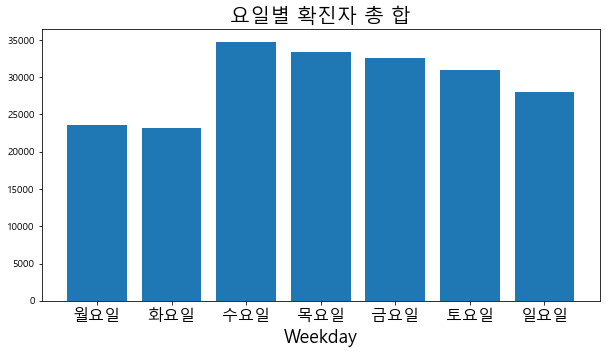

In [99]:
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'] 
day_2021 = day_2021.loc[weekday_order]

plt.figure(figsize=(10, 5)) 
plt.bar(day_2021.index, day_2021['합']) 
plt.title("요일별 확진자 총 합", fontsize=20) 
plt.xlabel("Weekday", fontsize=18) 
plt.xticks(fontsize=16) 
plt.show()

## 2. 확진자가 많은 구

In [100]:
# 월별로 묶기

month_2021 = corona_2021
month_2021['월'] = pd.DatetimeIndex(month_2021['확진일']).month #확진일에서 월 뽑아오기

month_2021 = month_2021.groupby("월").sum() #월별로 묶어서 합 구하기
month_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,74,194,215,171,142,225,252,183,727,5133
2,42,88,235,119,153,178,167,208,123,140,...,71,172,150,186,111,124,210,158,421,4068
3,63,79,131,139,253,114,188,137,122,113,...,25,127,172,123,158,222,191,249,233,3801
4,62,72,106,190,247,256,340,206,133,179,...,87,203,273,310,356,438,390,250,302,5810
5,80,93,173,172,219,253,285,272,260,230,...,153,263,226,252,282,540,448,324,250,6303
6,64,93,242,225,232,194,178,235,164,107,...,105,273,218,258,337,749,425,266,319,6107
7,201,213,480,487,466,383,417,486,354,372,...,316,650,725,1104,769,1275,832,518,637,14377
8,222,280,448,363,528,432,524,529,337,241,...,374,838,674,1012,666,1242,900,447,747,15019
9,396,562,414,591,879,925,664,747,553,520,...,585,1121,700,1062,659,1242,1671,863,1125,21148


In [101]:
# 1년간 구별 총 합 구하기

year_2021 = month_2021
del year_2021['합']
year_2021

year_2021.loc['총합'] =  month_2021.sum()
year_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,184,74,194,215,171,142,225,252,183,727
2,42,88,235,119,153,178,167,208,123,140,...,237,71,172,150,186,111,124,210,158,421
3,63,79,131,139,253,114,188,137,122,113,...,123,25,127,172,123,158,222,191,249,233
4,62,72,106,190,247,256,340,206,133,179,...,143,87,203,273,310,356,438,390,250,302
5,80,93,173,172,219,253,285,272,260,230,...,194,153,263,226,252,282,540,448,324,250
6,64,93,242,225,232,194,178,235,164,107,...,163,105,273,218,258,337,749,425,266,319
7,201,213,480,487,466,383,417,486,354,372,...,559,316,650,725,1104,769,1275,832,518,637
8,222,280,448,363,528,432,524,529,337,241,...,619,374,838,674,1012,666,1242,900,447,747
9,396,562,414,591,879,925,664,747,553,520,...,1418,585,1121,700,1062,659,1242,1671,863,1125


<AxesSubplot:>

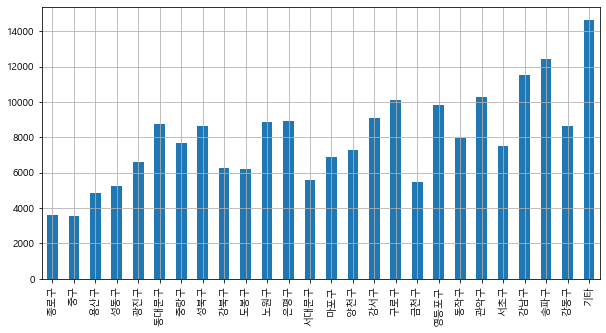

In [102]:
# 각 구별 1년간 총 합 그래프 그리기

year_2021.loc['총합'].plot(kind="bar", figsize=(10,5),grid=True)

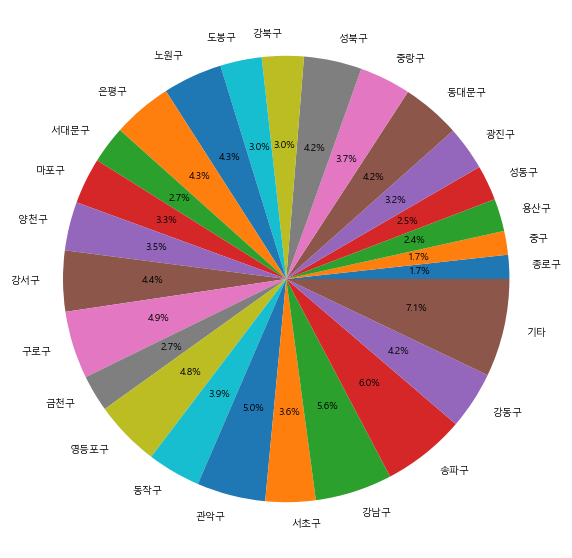

In [103]:
# 각 구별 1년간 총 합 그래프 그리기 - 원

plt.figure(figsize=(10,10))
plt.axis('equal')
plt.pie(year_2021.loc['총합'], labels=year_2021.columns, autopct="%1.1f%%")
plt.show()

In [104]:
# 기타(소재불분명)을 제외하고 송파구, 강남구, 관악구 순으로 확진자가 많고 
# 중구, 종로구, 용산구가 비교적 확진자 수가 적은것을 알 수 있다

In [105]:
# 지도 시각화 준비

m_year = year_2021.transpose()
m_year

월,1,2,3,4,5,6,7,8,9,10,11,12,총합
종로구,122,42,63,62,80,64,201,222,396,511,618,1210,3591
중구,74,88,79,72,93,93,213,280,562,368,596,1034,3552
용산구,106,235,131,106,173,242,480,448,414,435,629,1479,4878
성동구,141,119,139,190,172,225,487,363,591,454,800,1580,5261
광진구,125,153,253,247,219,232,466,528,879,515,928,2070,6615
동대문구,222,178,114,256,253,194,383,432,925,1002,1641,3179,8779
중랑구,219,167,188,340,285,178,417,524,664,637,1213,2857,7689
성북구,211,208,137,206,272,235,486,529,747,835,1698,3087,8651
강북구,186,123,122,133,260,164,354,337,553,663,1135,2224,6254
도봉구,182,140,113,179,230,107,372,241,520,546,1093,2488,6211


In [106]:
# 지도로 시각화

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"#구 이름이 한글로 되어있기 때문에 바로 못넘김
geo_str=json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
map.choropleth(geo_data=geo_str, data=m_year['총합'], key_on='feature.id',
              columns=[m_year.index, m_year['총합']], fill_color="PuRd")
map

C:\Users\ch002\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 서울시 자치구별 총 인구수

In [107]:
df = pd.read_table("data/report.txt", sep="\t")
df
df = df.iloc[:,[1,2]]
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
지역,합계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
인구,"9,736,027","153,789","131,787","237,285","292,672","352,627","352,006","391,885","440,142","302,563",...,"579,768","421,163","244,891","400,908","394,364","499,449","416,167","537,800","663,965","466,472"


In [108]:
m_year.reset_index()
m_year.rename(columns={'index':'지역'})
m_year.transpose()
m_year.loc[:,'총 인구']=['153789', '131787', '237285', '292672', '352627', '352006',
                     '391885', '440142', '302563', '319373', '514946', '477173', '315659',
                     '378686', '450487', '579768', '421163', '244891', '400908', '394364', '499449',
                     '416167', '537800', '663965', '466472', '0']

In [109]:
m_year

월,1,2,3,4,5,6,7,8,9,10,11,12,총합,총 인구
종로구,122,42,63,62,80,64,201,222,396,511,618,1210,3591,153789
중구,74,88,79,72,93,93,213,280,562,368,596,1034,3552,131787
용산구,106,235,131,106,173,242,480,448,414,435,629,1479,4878,237285
성동구,141,119,139,190,172,225,487,363,591,454,800,1580,5261,292672
광진구,125,153,253,247,219,232,466,528,879,515,928,2070,6615,352627
동대문구,222,178,114,256,253,194,383,432,925,1002,1641,3179,8779,352006
중랑구,219,167,188,340,285,178,417,524,664,637,1213,2857,7689,391885
성북구,211,208,137,206,272,235,486,529,747,835,1698,3087,8651,440142
강북구,186,123,122,133,260,164,354,337,553,663,1135,2224,6254,302563
도봉구,182,140,113,179,230,107,372,241,520,546,1093,2488,6211,319373


In [110]:
m_year.info()
m_year.astype({'총 인구':'int64'})
m_year['총 인구'] = pd.to_numeric(m_year['총 인구'])
m_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 종로구 to 기타
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       26 non-null     int64 
 1   2       26 non-null     int64 
 2   3       26 non-null     int64 
 3   4       26 non-null     int64 
 4   5       26 non-null     int64 
 5   6       26 non-null     int64 
 6   7       26 non-null     int64 
 7   8       26 non-null     int64 
 8   9       26 non-null     int64 
 9   10      26 non-null     int64 
 10  11      26 non-null     int64 
 11  12      26 non-null     int64 
 12  총합      26 non-null     int64 
 13  총 인구    26 non-null     object
dtypes: int64(13), object(1)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 종로구 to 기타
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       26 non-null     int64
 1   2       26 non-null     int64
 2   3       26 non-null     int6

In [111]:
def mean_corona(a, b):
    return (a/b)*100

m_year['비율'] = mean_corona(m_year['총합'], m_year['총 인구'])
m_year

월,1,2,3,4,5,6,7,8,9,10,11,12,총합,총 인구,비율
종로구,122,42,63,62,80,64,201,222,396,511,618,1210,3591,153789,2.335017
중구,74,88,79,72,93,93,213,280,562,368,596,1034,3552,131787,2.695258
용산구,106,235,131,106,173,242,480,448,414,435,629,1479,4878,237285,2.055756
성동구,141,119,139,190,172,225,487,363,591,454,800,1580,5261,292672,1.797575
광진구,125,153,253,247,219,232,466,528,879,515,928,2070,6615,352627,1.875920
동대문구,222,178,114,256,253,194,383,432,925,1002,1641,3179,8779,352006,2.493992
중랑구,219,167,188,340,285,178,417,524,664,637,1213,2857,7689,391885,1.962055
성북구,211,208,137,206,272,235,486,529,747,835,1698,3087,8651,440142,1.965502
강북구,186,123,122,133,260,164,354,337,553,663,1135,2224,6254,302563,2.067008
도봉구,182,140,113,179,230,107,372,241,520,546,1093,2488,6211,319373,1.944748


<AxesSubplot:>

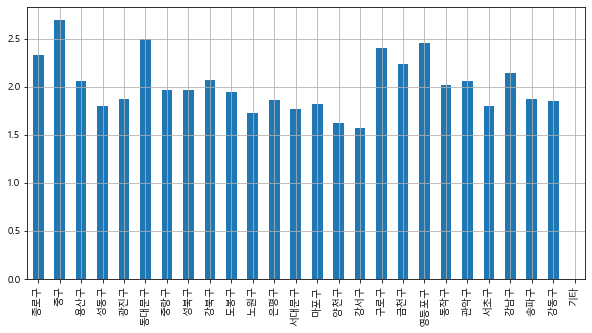

In [112]:
a = m_year.transpose()
a.loc['비율'].plot(kind="bar", figsize=(10,5),grid=True)

## 3. 이상치가 발견된 구

In [113]:
# 2021년도 코로나 자료만 추출

corona_seoul = corona_seoul[89:455]
corona_seoul

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
89,2021.12.31.00,3973,24,3671,22,5274,38,5707,43,7042,...,8311,52,12452,86,13634,109,9229,106,16789,100
90,2021.12.30.00,3949,28,3649,23,5236,33,5664,53,6981,...,8260,69,12366,84,13525,120,9123,92,16689,113
91,2021.12.29.00,3921,43,3626,33,5203,36,5611,42,6919,...,8191,71,12282,67,13405,86,9031,91,16577,180
92,2021.12.28.00,3878,40,3593,23,5167,29,5569,39,6870,...,8120,33,12215,67,13319,82,8940,57,16399,77
93,2021.12.27.00,3838,30,3570,29,5139,31,5530,26,6819,...,8087,56,12148,69,13237,116,8883,57,16322,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2021.01.05.00,426,4,286,1,433,4,473,4,485,...,849,2,962,10,1157,11,622,11,2482,12
451,2021.01.04.00,422,4,285,2,429,1,469,9,479,...,847,4,952,11,1146,8,611,8,2470,130
452,2021.01.03.00,418,4,283,0,428,3,460,0,470,...,843,9,941,3,1138,12,603,12,2340,16
453,2021.01.02.00,414,10,283,1,425,7,460,10,465,...,834,8,938,3,1126,8,591,10,2324,24


In [114]:
# 날짜를 인덱스 컬럼으로 설정 하기!

corona_seoul = corona_seoul.set_index("자치구 기준일")

In [115]:
# 강동구와 한강 인접 구 데이터 

han_river_gu = corona_seoul[["강동구 전체", "강서구 전체", "영등포구 전체", "마포구 전체", "동작구 전체", 
             "용산구 전체", "강남구 전체", "성동구 전체", "송파구 전체", "서초구 전체"]]

In [116]:
han_river_gu

,강동구 전체,강서구 전체,영등포구 전체,마포구 전체,동작구 전체,용산구 전체,강남구 전체,성동구 전체,송파구 전체,서초구 전체
자치구 기준일,,,,,,,,,,
2021.12.31.00,9229,10436,10507,7570,8791,5274,12452,5707,13634,8311
2021.12.30.00,9123,10360,10429,7514,8739,5236,12366,5664,13525,8260
2021.12.29.00,9031,10294,10353,7464,8674,5203,12282,5611,13405,8191
2021.12.28.00,8940,10192,10266,7409,8601,5167,12215,5569,13319,8120
2021.12.27.00,8883,10150,10224,7371,8560,5139,12148,5530,13237,8087
...,...,...,...,...,...,...,...,...,...,...
2021.01.05.00,622,1382,742,719,869,433,962,473,1157,849
2021.01.04.00,611,1378,731,714,861,429,952,469,1146,847
2021.01.03.00,603,1363,717,707,851,428,941,460,1138,843


In [117]:
han_river_gu_re = han_river_gu.rename(columns = {"강동구 전체" : "강동구", "강서구 전체" : "강서구", "영등포구 전체" : "영등포구", 
                               "마포구 전체" : "마포구", "동작구 전체" : "동작구", "용산구 전체" : "용산구", 
                               "강남구 전체" : "강남구", "성동구 전체" : "성동구", "송파구 전체" : "송파구", 
                               "서초구 전체" : "서초구"})

<AxesSubplot:ylabel='자치구 기준일'>

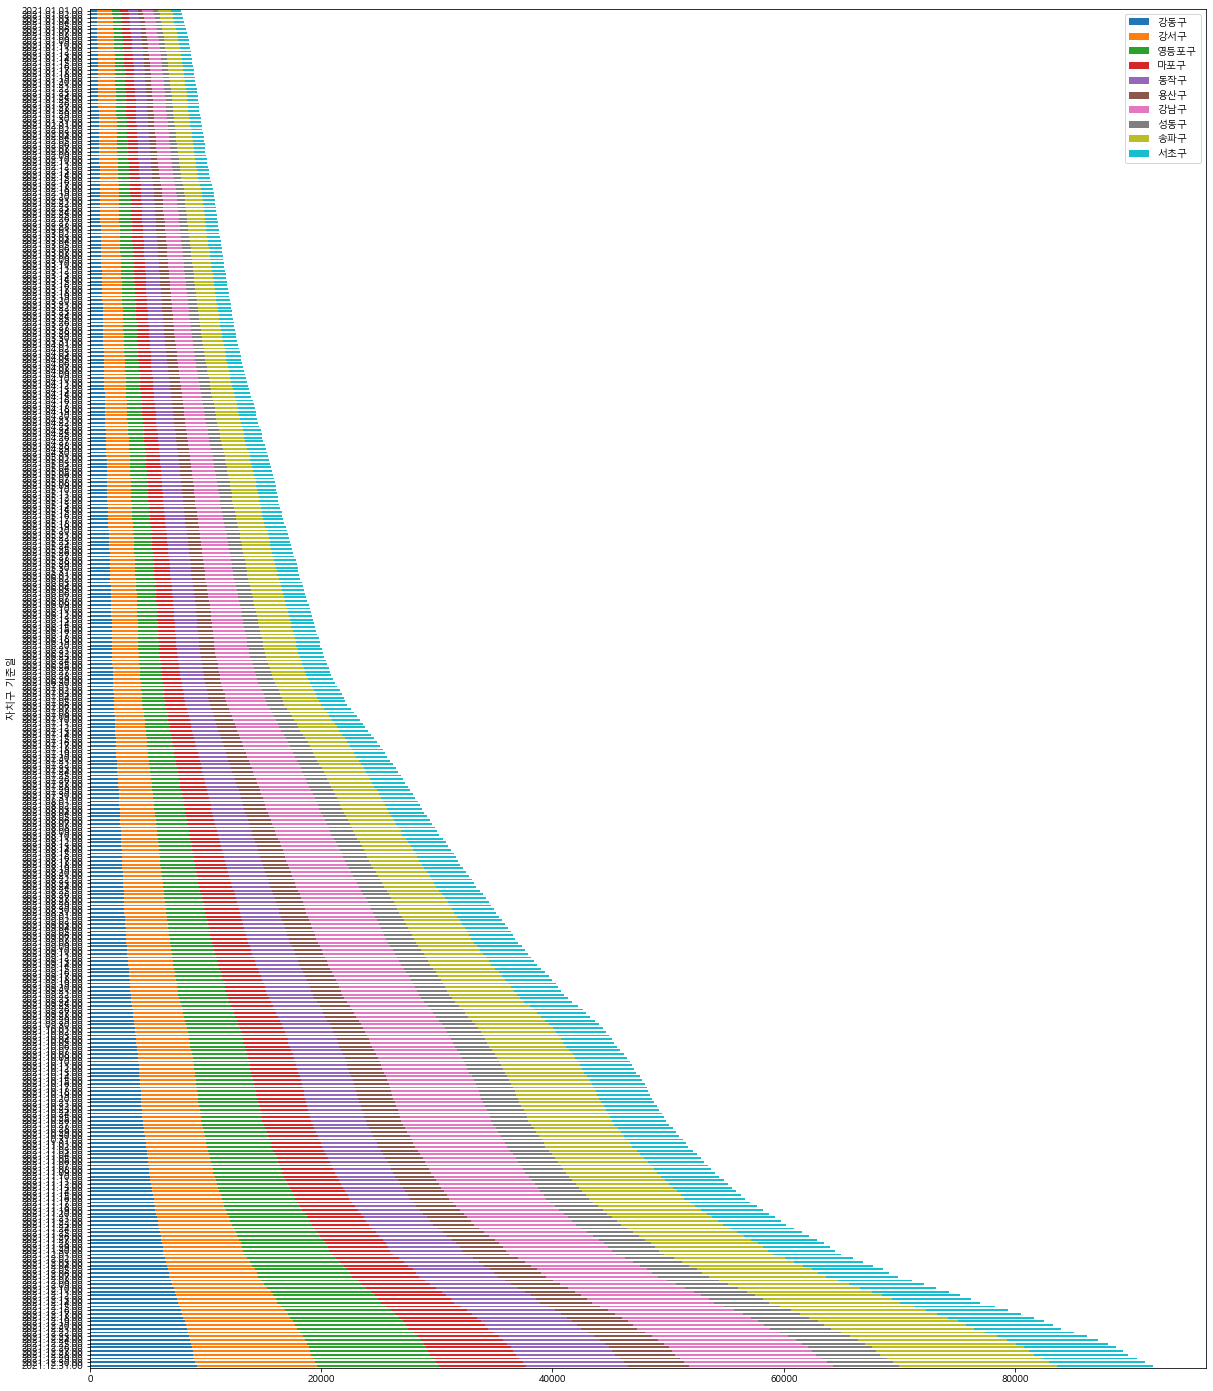

In [118]:
han_river_gu_re.plot(kind = "barh", stacked = True, figsize = (20, 25))

#### 분석!

- 위의 그래프로 보았을때 시간이 지남에 따라 폭이 점점 넓어지고 있는걸 알수 있고 이를 통해
    각 구역별 감염자 수의 숫자 증가를 한번에 볼수 있습니다.
- 대부분의 지역이 시간과 비례하여 감염자가 증가하였습니다.
- 몇몇 지역은 감염자의 증가 폭이 그리 크지 않음을 확인하였습니다.(마포, 용산, 성동)

In [119]:
folium.Map(location = [37.5244, 126.9807], zoom_start = 11)

In [120]:
map = folium.Map(location = [37.5244, 126.9807], zoom_start = 11)

In [121]:
# 서울 행정구 경계 데이터

state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'


array([[<AxesSubplot:title={'center':'강동구'}>,
        <AxesSubplot:title={'center':'강서구'}>,
        <AxesSubplot:title={'center':'영등포구'}>],
       [<AxesSubplot:title={'center':'마포구'}>,
        <AxesSubplot:title={'center':'동작구'}>,
        <AxesSubplot:title={'center':'용산구'}>],
       [<AxesSubplot:title={'center':'강남구'}>,
        <AxesSubplot:title={'center':'성동구'}>,
        <AxesSubplot:title={'center':'송파구'}>],
       [<AxesSubplot:title={'center':'서초구'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

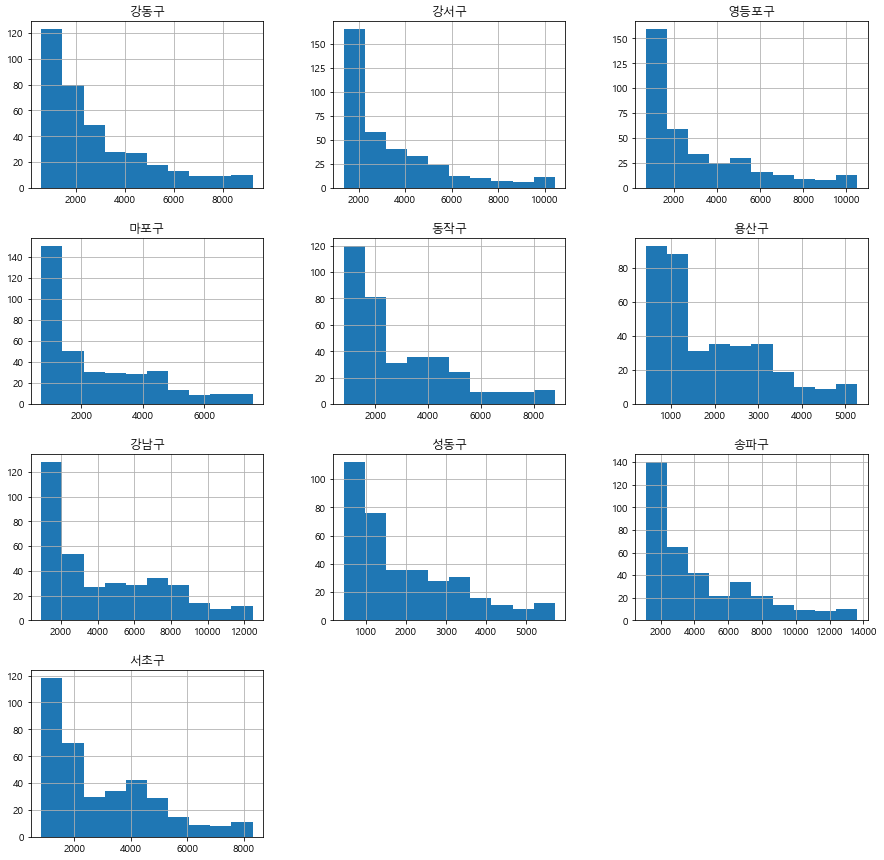

In [122]:
han_river_gu_re.hist(figsize = (15, 15))

<AxesSubplot:>

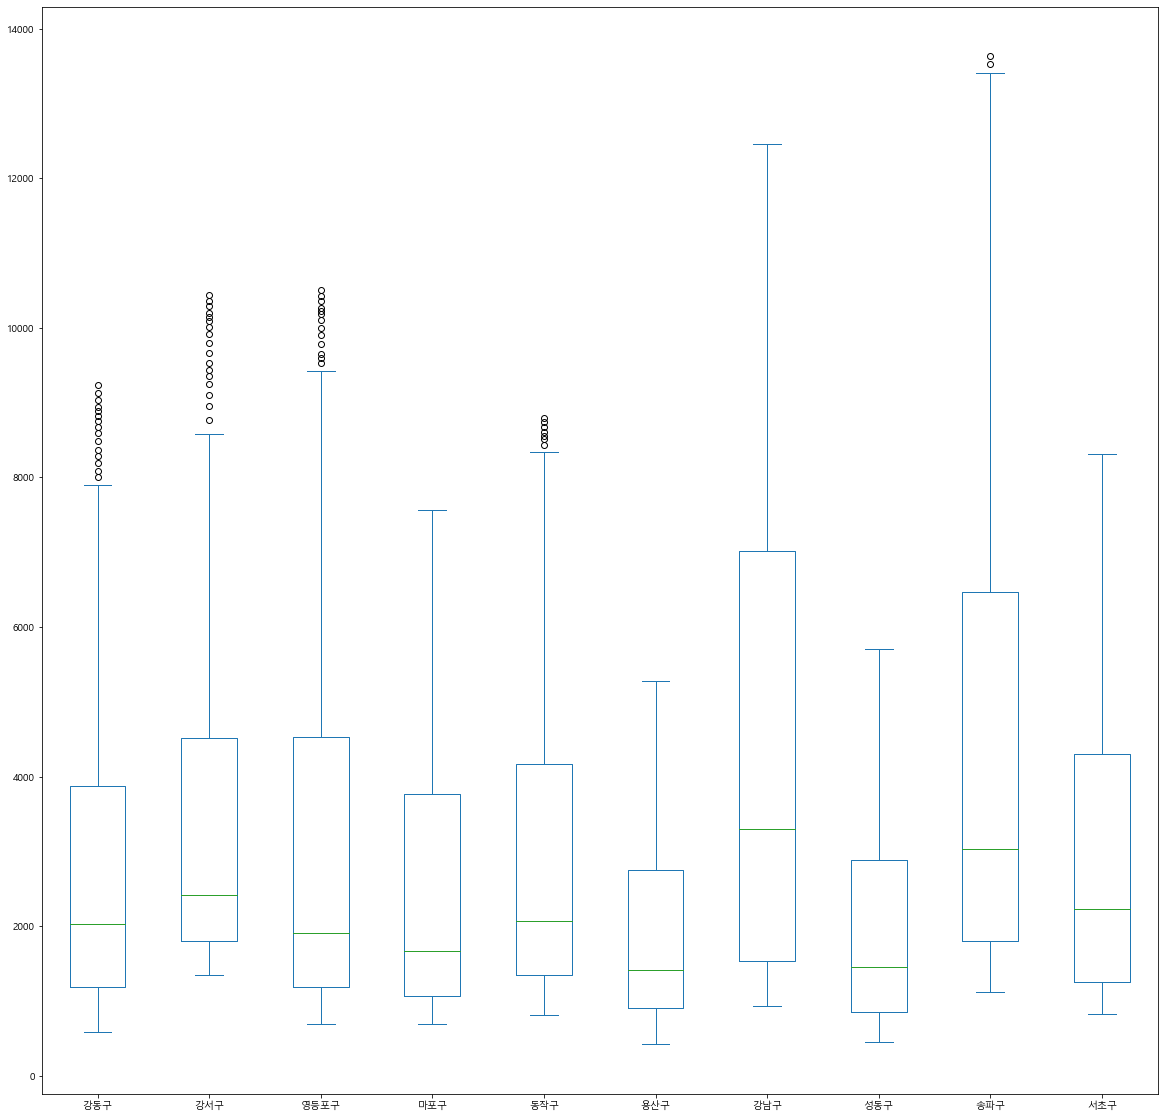

In [123]:
han_river_gu_re.plot.box(figsize = (20, 20))

In [124]:
# 강동구, 강서구, 영등포구, 동작구, 송파구의 경우에 이상치가 발견 되었다.
# 특이하게도 한강 이남의 구에서만 이상치가 있는 구가 발견되었다.

In [125]:
latitude_gu1 = corona_seoul[["강서구 전체", "양천구 전체", "구로구 전체"]]

In [126]:
latitude_gu1

,강서구 전체,양천구 전체,구로구 전체
자치구 기준일,,,
2021.12.31.00,10436,7965,10620
2021.12.30.00,10360,7891,10558
2021.12.29.00,10294,7843,10476
2021.12.28.00,10192,7766,10390
2021.12.27.00,10150,7714,10346
...,...,...,...
2021.01.05.00,1382,775,654
2021.01.04.00,1378,766,645
2021.01.03.00,1363,756,636


In [127]:
latitude_gu1 = pd.DataFrame(latitude_gu1)

## 3. 위도와 경도의 차이에 따른 전염

In [130]:
# 1년간 월별 데이터
covid19_2021 = month_2021.drop(['총합'])
covid19_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,184,74,194,215,171,142,225,252,183,727
2,42,88,235,119,153,178,167,208,123,140,...,237,71,172,150,186,111,124,210,158,421
3,63,79,131,139,253,114,188,137,122,113,...,123,25,127,172,123,158,222,191,249,233
4,62,72,106,190,247,256,340,206,133,179,...,143,87,203,273,310,356,438,390,250,302
5,80,93,173,172,219,253,285,272,260,230,...,194,153,263,226,252,282,540,448,324,250
6,64,93,242,225,232,194,178,235,164,107,...,163,105,273,218,258,337,749,425,266,319
7,201,213,480,487,466,383,417,486,354,372,...,559,316,650,725,1104,769,1275,832,518,637
8,222,280,448,363,528,432,524,529,337,241,...,619,374,838,674,1012,666,1242,900,447,747
9,396,562,414,591,879,925,664,747,553,520,...,1418,585,1121,700,1062,659,1242,1671,863,1125


In [131]:
# 위도의 차이로만 행정구 구하기

longitude_gu1 = covid19_2021.loc[: ,["강서구", "양천구", "구로구"]]
longitude_gu1

,강서구,양천구,구로구
월,,,
1,216,233,184
2,99,138,237
3,125,114,123
4,218,176,143
5,199,176,194
6,210,181,163
7,565,414,559
8,645,584,619
9,889,621,1418


<AxesSubplot:xlabel='월'>

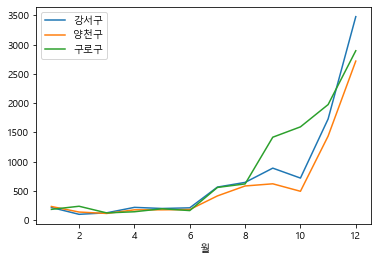

In [132]:
longitude_gu1.plot()

<AxesSubplot:xlabel='월'>

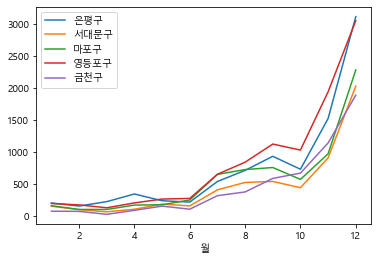

In [133]:
longitude_gu2 = covid19_2021.loc[: ,["은평구", "서대문구", "마포구", "영등포구", "금천구"]]
longitude_gu2

longitude_gu2.plot()

<AxesSubplot:xlabel='월'>

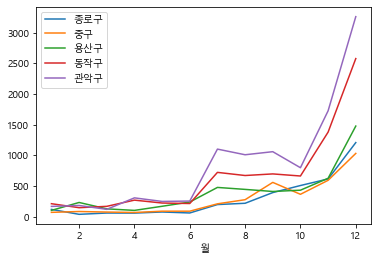

In [134]:
longitude_gu3 = covid19_2021.loc[: ,["종로구", "중구", "용산구", "동작구", "관악구"]]
longitude_gu3

longitude_gu3.plot()

<AxesSubplot:xlabel='월'>

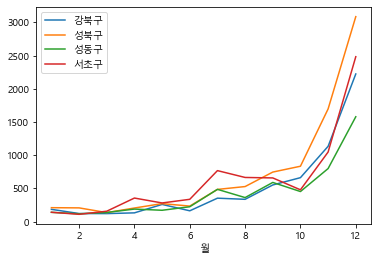

In [135]:
longitude_gu4 = covid19_2021.loc[: ,["강북구", "성북구", "성동구", "서초구"]]
longitude_gu4

longitude_gu4.plot()

<AxesSubplot:xlabel='월'>

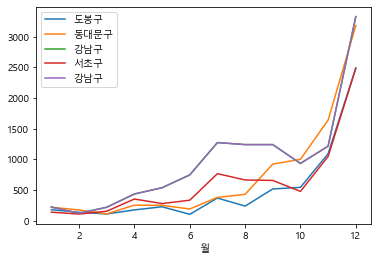

In [136]:
longitude_gu5 = covid19_2021.loc[: ,["도봉구", "동대문구", "강남구", "서초구", "강남구"]]
longitude_gu5

longitude_gu5.plot()

<AxesSubplot:xlabel='월'>

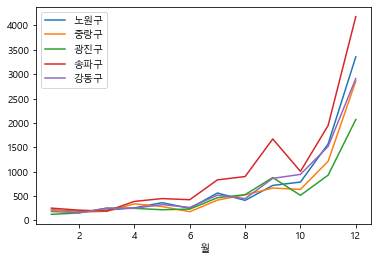

In [137]:
longitude_gu6 = covid19_2021.loc[: ,["노원구", "중랑구", "광진구", "송파구", "강동구"]]
longitude_gu6

longitude_gu6.plot()

<AxesSubplot:xlabel='월'>

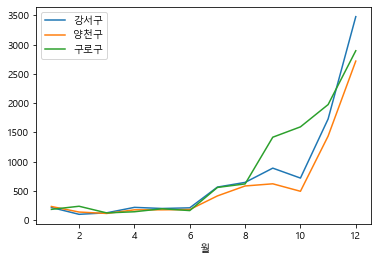

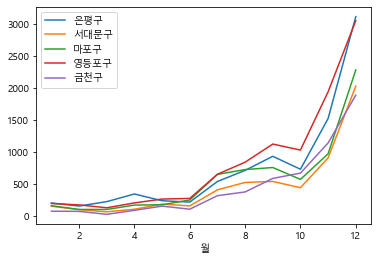

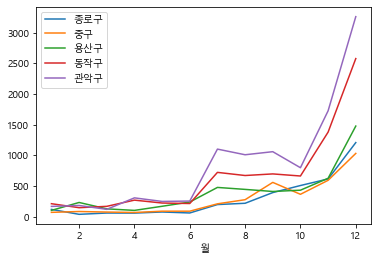

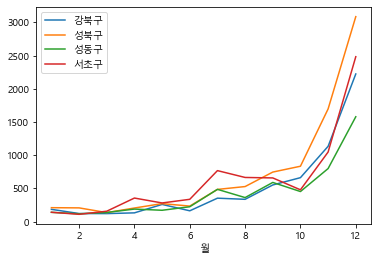

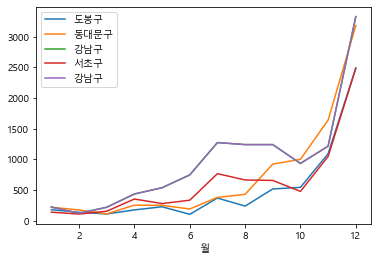

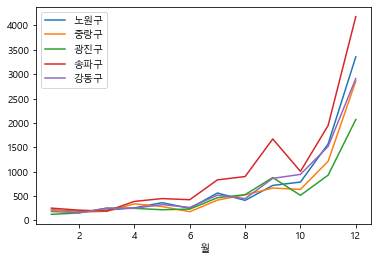

In [138]:
longitude_gu1.plot()
longitude_gu2.plot()
longitude_gu3.plot()
longitude_gu4.plot()
longitude_gu5.plot()
longitude_gu6.plot()

In [139]:
# 1. 강서구
# 2. 은평구
# 3. 관악구
# 4. 성북구
# 5. 강남구
# 6. 송파구
# 전혀 규칙성이 없다.

<AxesSubplot:xlabel='월'>

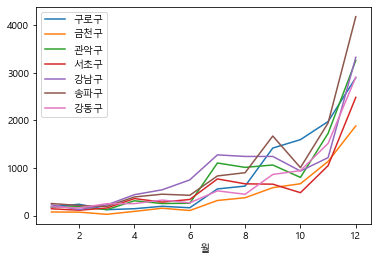

In [140]:
latitude_gu1 = covid19_2021.loc[: ,["구로구", "금천구", "관악구", "서초구", "강남구", "송파구", "강동구"]]
latitude_gu1

latitude_gu1.plot()

<AxesSubplot:xlabel='월'>

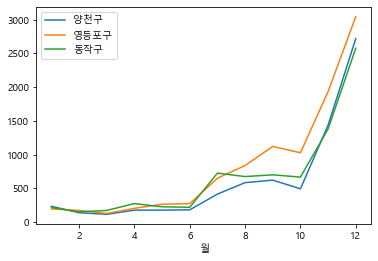

In [141]:
latitude_gu2 = covid19_2021.loc[: ,["양천구", "영등포구", "동작구"]]
latitude_gu2

latitude_gu2.plot()

<AxesSubplot:xlabel='월'>

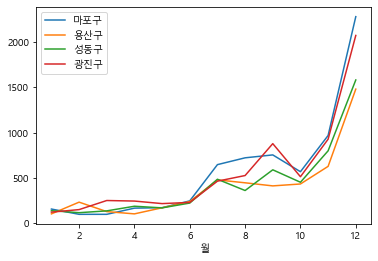

In [142]:
latitude_gu3 = covid19_2021.loc[: ,["마포구", "용산구", "성동구", "광진구"]]
latitude_gu3

latitude_gu3.plot()

<AxesSubplot:xlabel='월'>

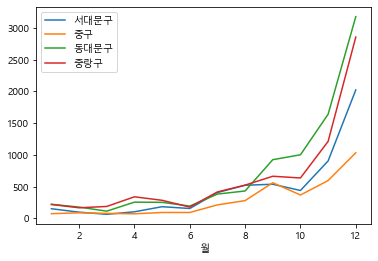

In [143]:
latitude_gu4 = covid19_2021.loc[: ,["서대문구", "중구", "동대문구", "중랑구"]]
latitude_gu4

latitude_gu4.plot()

<AxesSubplot:xlabel='월'>

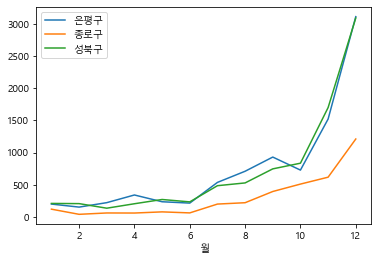

In [144]:
latitude_gu5 = covid19_2021.loc[: ,["은평구", "종로구", "성북구"]]
latitude_gu5

latitude_gu5.plot()

<AxesSubplot:xlabel='월'>

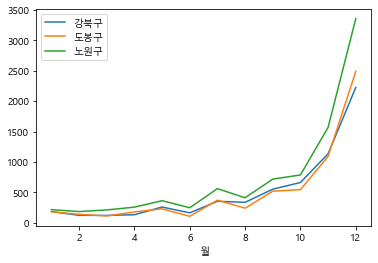

In [145]:
latitude_gu6 = covid19_2021.loc[: ,["강북구", "도봉구", "노원구"]]
latitude_gu6

latitude_gu6.plot()

<AxesSubplot:xlabel='월'>

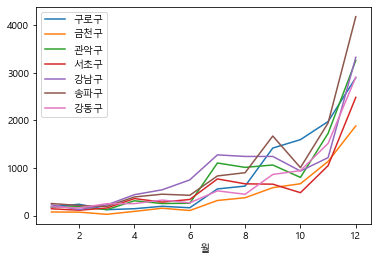

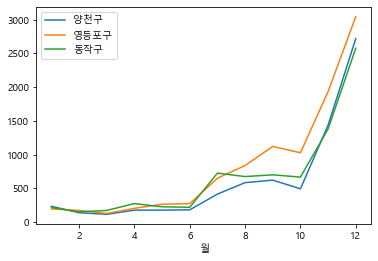

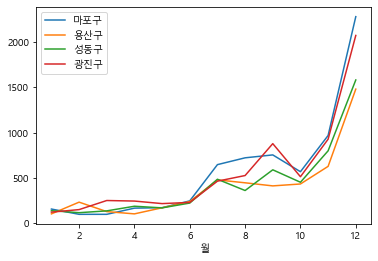

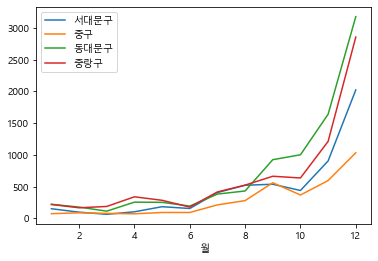

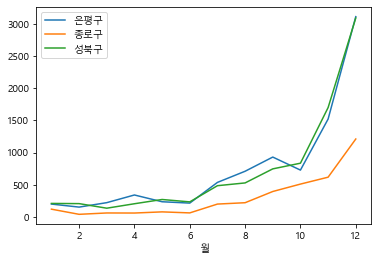

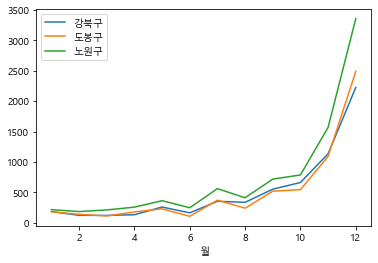

In [146]:
latitude_gu1.plot()
latitude_gu2.plot()
latitude_gu3.plot()
latitude_gu4.plot()
latitude_gu5.plot()
latitude_gu6.plot()